<a href="https://colab.research.google.com/github/AllanKamimura/Pai_ta_ON_python/blob/main/school/SEM5952/aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow_addons

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator

     |████████████████████████████████| 1.1 MB 35.9 MB/s 


###dataset: fruits360

https://www.kaggle.com/datasets/moltean/fruits

In [ ]:
file_id = "1mT6gj6RTM6cEZFNcgsHRRbpUyrzGIlOZ"
file_name = "fruits.zip"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$file_id -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$file_id -O $file_name && rm -rf /tmp/cookies.txt
!unzip -qq fruits.zip

--2022-09-27 01:36:12--  https://docs.google.com/uc?export=download&confirm=t&id=1mT6gj6RTM6cEZFNcgsHRRbpUyrzGIlOZ
Resolving docs.google.com (docs.google.com)... 74.125.68.100, 74.125.68.138, 74.125.68.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.68.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ktojh96pdjqnhrq68jv5i23uh6a80ahp/1664242500000/04276797103978053322/*/1mT6gj6RTM6cEZFNcgsHRRbpUyrzGIlOZ?e=download&uuid=3a15e98d-d9d2-4ef7-a34e-600f5267b314 [following]
--2022-09-27 01:36:14--  https://doc-10-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ktojh96pdjqnhrq68jv5i23uh6a80ahp/1664242500000/04276797103978053322/*/1mT6gj6RTM6cEZFNcgsHRRbpUyrzGIlOZ?e=download&uuid=3a15e98d-d9d2-4ef7-a34e-600f5267b314
Resolving doc-10-8o-docs.googleusercontent.com (doc-10-8o-docs.googleusercontent.com)... 74.125.24.132, 2404:

In [ ]:
height, width = 80, 80

datagen = ImageDataGenerator(
    rescale = 1/255)

train_data = datagen.flow_from_directory(
    directory = "/content/fruits-360_dataset/fruits-360/Training",
    target_size = (height, width),
    shuffle = True,
    batch_size = 100,
)

valid_data = datagen.flow_from_directory(
    directory = "/content/fruits-360_dataset/fruits-360/Test",
    target_size = (height, width),
    shuffle = True,
    batch_size = 100,
)

indices_class = {value: key for key, value in valid_data.class_indices.items()}

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
model = tf.keras.Sequential(
    [tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu", input_shape = (80, 80, 3)),
     tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = "relu"),
     tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = "relu"),
     tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = "relu"),
     tf.keras.layers.Conv2D(filters = 131, kernel_size = 1, activation = "softmax"),
     tf.keras.layers.GlobalAveragePooling2D()
     ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 76, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 512)       1180160   
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 131)       67203     
                                                                 
 global_average_pooling2d (G  (None, 131)              0         
 lobalAveragePooling2D)                                          
                                                        

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy", tf.keras.metrics.Recall(), tfa.metrics.F1Score(131)]
)

hist = model.fit(train_data,
                 validation_data = valid_data,
                 epochs = 5)

Epoch 1/5
677/677 [==============================] - 652s 925ms/step - loss: 3.0775 - accuracy: 0.2888 - recall: 0.0065 - f1_score: 0.2858 - val_loss: 2.1710 - val_accuracy: 0.4985 - val_recall: 0.0285 - val_f1_score: 0.4283
Epoch 2/5
677/677 [==============================] - 612s 904ms/step - loss: 1.9322 - accuracy: 0.5828 - recall: 0.0309 - f1_score: 0.5752 - val_loss: 1.8227 - val_accuracy: 0.6364 - val_recall: 0.0565 - val_f1_score: 0.5984
Epoch 3/5
677/677 [==============================] - 612s 904ms/step - loss: 1.7192 - accuracy: 0.6433 - recall: 0.0488 - f1_score: 0.6373 - val_loss: 1.7224 - val_accuracy: 0.6279 - val_recall: 0.0626 - val_f1_score: 0.6037
Epoch 4/5
677/677 [==============================] - 612s 904ms/step - loss: 1.6191 - accuracy: 0.6755 - recall: 0.0648 - f1_score: 0.6704 - val_loss: 1.6462 - val_accuracy: 0.6759 - val_recall: 0.0871 - val_f1_score: 0.6434
Epoch 5/5
677/677 [==============================] - 611s 903ms/step - loss: 1.5360 - accuracy: 0.70

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
images, labels = valid_data.next()

In [ ]:
images[0]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


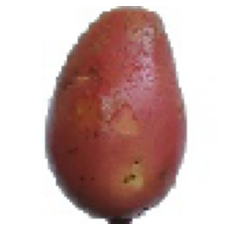

In [14]:
plt.imshow((images[0] * 255).astype(np.uint8))
plt.axis("off")
print(labels[0])

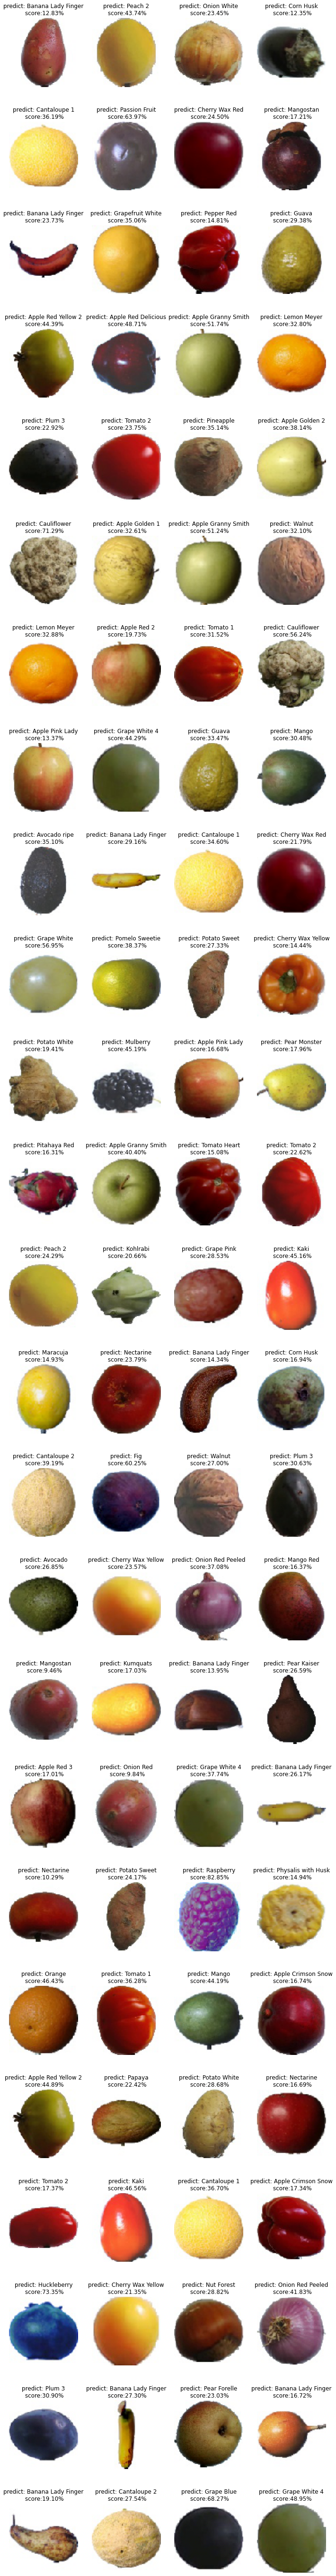

In [17]:
predicts = model.predict(images)

n_rows = (len(images) // 4) + 1
plt.figure(figsize = (12,n_rows * 4))
# plt.subplots_adjust(hspace = 0.1)

for index, image in enumerate(images):
    plt.subplot(n_rows, 4, index + 1)
    image = np.asarray((image * 255), dtype = np.uint8)
    plt.imshow(image)
    plt.axis("off")
    plt.title("predict: {}\n score:{:.2f}%".format(
        indices_class[np.argmax(predicts[index])],
        predicts[index][np.argmax(predicts[index])] * 100
    ))